# Laboratorio 01
**Autor:** Pinguinos 9.0  
**Fecha:** 07/02/2026

## Librerías de uso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

## Carga y prepara datos

In [2]:
# Concatena la ruta actual del proyecto con la carpeta de datos locales
# Nota: En Python usamos os.path.join() en lugar de paste0()
ruta = os.path.join(os.getcwd(), 'data')

# carga de datos desde el archivo fuente
# Nota: el archivo usa palabras completas (edible, poisonous) no códigos de una letra
dat_Originales = pd.read_csv(
    "./data/agaricus-lepiota.data",
    header=None,
    sep=",",
    na_values="?"
)

# elimina los datos no significativos para estudios
datos = dat_Originales.iloc[:, [0, 1, 2, 4, 5, 7, 8, 9, 21, 22]]

# asignar nombres
datos.columns = [
    "class", "cap_shape", "cap_surface", "bruises", "odor",
    "gill_spacing", "gill_size", "gill_color",
    "population", "habitat"
]

# exploración rápida de los datos
print(datos.head(n=30))

# Verificar las clases presentes
print("\n=== Distribución de clases ===")
print(datos['class'].value_counts())

# manejo de NA
datos = datos.fillna("unknown")

# crear variable derivada
datos['Fac_Odor'] = datos['odor'].apply(
    lambda x: "pleasant" if x in ["almond", "anise"] else "strong"
)

# crear factores (convertir a tipo category)
datos['class'] = datos['class'].astype('category')
datos['cap_shape'] = datos['cap_shape'].astype('category')
datos['cap_surface'] = datos['cap_surface'].astype('category')
datos['bruises'] = datos['bruises'].astype('category')
datos['odor'] = datos['odor'].astype('category')
datos['gill_spacing'] = datos['gill_spacing'].astype('category')
datos['gill_size'] = datos['gill_size'].astype('category')
datos['gill_color'] = datos['gill_color'].astype('category')
datos['population'] = datos['population'].astype('category')
datos['habitat'] = datos['habitat'].astype('category')
datos['Fac_Odor'] = datos['Fac_Odor'].astype('category')

# imprime como tabla la estructura del set de datos
print("\n=== Estructura del dataset ===")
print(datos.info())
print("\n=== Primeras filas ===")
print(datos.head())

     class cap_shape cap_surface  bruises    odor gill_spacing gill_size  \
0   edible    convex      smooth  bruises  almond      crowded    narrow   
1   edible    convex      smooth  bruises  almond      crowded    narrow   
2   edible    convex      smooth  bruises  almond      crowded    narrow   
3   edible    convex      smooth  bruises  almond      crowded    narrow   
4   edible    convex      smooth  bruises  almond      crowded    narrow   
5   edible    convex      smooth  bruises  almond      crowded    narrow   
6   edible    convex      smooth  bruises   anise      crowded    narrow   
7   edible    convex      smooth  bruises   anise      crowded    narrow   
8   edible    convex      smooth  bruises   anise      crowded    narrow   
9   edible    convex      smooth  bruises   anise      crowded    narrow   
10  edible    convex      smooth  bruises   anise      crowded    narrow   
11  edible    convex      smooth  bruises   anise      crowded    narrow   
12  edible  

## Partición de datos y visualizaciones

In [3]:
# Parte a del ejercicio 3: se crea la semilla.
np.random.seed(1024)

# se crea la partición para ver cuales van a entrenamiento y cuales a prueba
train, test = train_test_split(
    datos,
    test_size=0.3,
    random_state=1024,
    stratify=datos['class']
)

# Verificación de datos
print("Proporción de clases en train:")
print(train['class'].value_counts(normalize=True))

# Verificación de datos
print("\nProporción de clases en test:")
print(test['class'].value_counts(normalize=True))

Proporción de clases en train:
class
edible       0.533186
poisonous    0.466814
Name: proportion, dtype: float64

Proporción de clases en test:
class
edible       0.533465
poisonous    0.466535
Name: proportion, dtype: float64


### Parte b del ejercicio 3: creación de gráficas

<Figure size 1000x600 with 0 Axes>

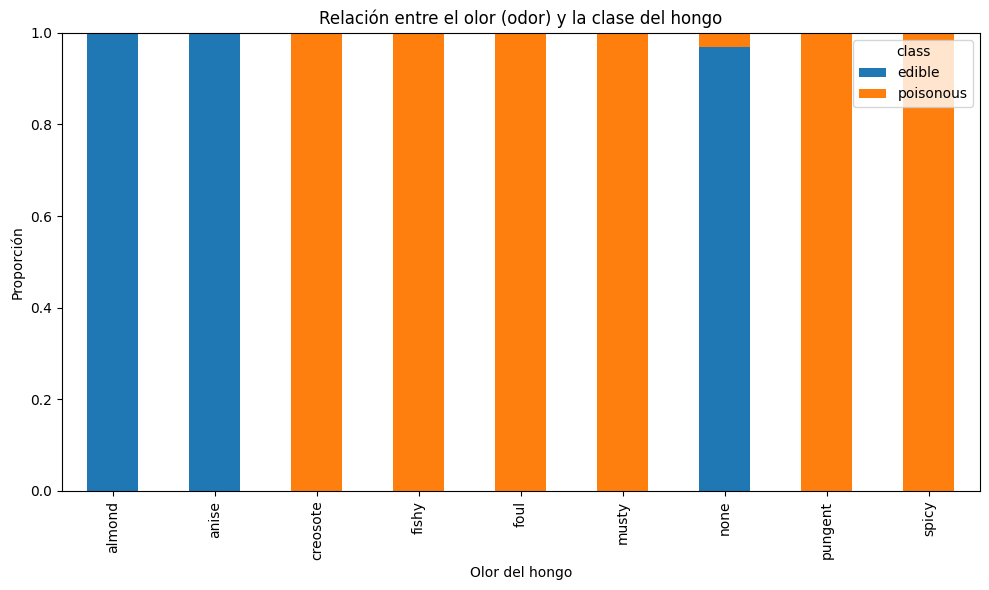

In [4]:
# primero variable "odor"

# se usa la librería de matplotlib/seaborn
plt.figure(figsize=(10, 6))

# preparar datos para gráfico de proporciones
odor_class = pd.crosstab(datos['odor'], datos['class'], normalize='index')

# acomodo de posiciones
odor_class.plot(kind='bar', stacked=True, figsize=(10, 6))

# Definir lo que va a decir la gráfica
plt.title("Relación entre el olor (odor) y la clase del hongo")
plt.xlabel("Olor del hongo")
plt.ylabel("Proporción")
plt.legend(title="class")

# imprimir la gráfica de manera simple o sencilla
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

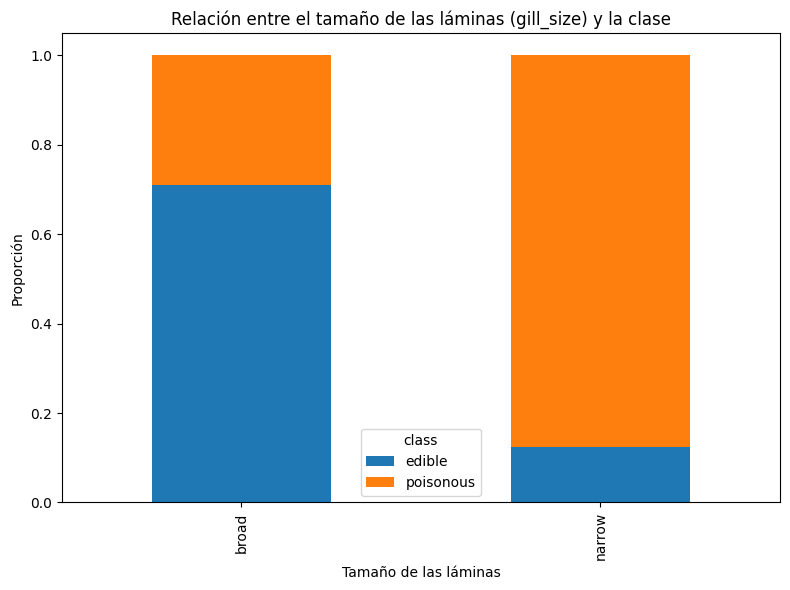

In [5]:
# variable gill_size

plt.figure(figsize=(8, 6))

# preparar datos para gráfico de proporciones
gill_class = pd.crosstab(datos['gill_size'], datos['class'], normalize='index')

gill_class.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title("Relación entre el tamaño de las láminas (gill_size) y la clase")
plt.xlabel("Tamaño de las láminas")
plt.ylabel("Proporción")
plt.legend(title="class")

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

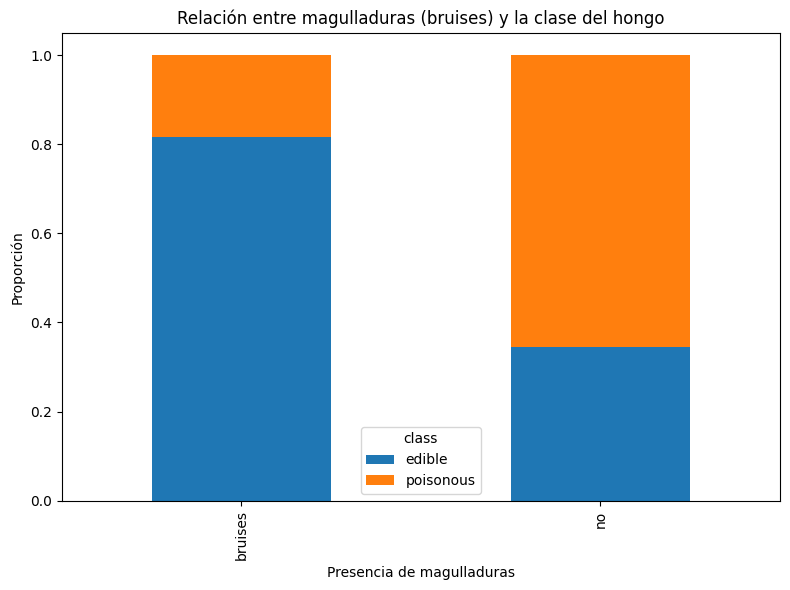

In [6]:
# variable bruises

plt.figure(figsize=(8, 6))

# preparar datos para gráfico de proporciones
bruises_class = pd.crosstab(datos['bruises'], datos['class'], normalize='index')

bruises_class.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title("Relación entre magulladuras (bruises) y la clase del hongo")
plt.xlabel("Presencia de magulladuras")
plt.ylabel("Proporción")
plt.legend(title="class")

plt.tight_layout()
plt.show()

## Modelado

In [7]:
### ===============================
### 1. Variables predictoras
### ===============================

X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)

y_train = train['class']
y_test = test['class']


### ===============================
### 2. Modelo ingenuo (baseline)
### ===============================

clase_mayoritaria = y_train.mode()[0]

pred_naive = np.repeat(clase_mayoritaria, len(y_test))

acc_naive = accuracy_score(y_test, pred_naive)


### ===============================
### 3. Modelo GLM (Regresión Logística)
### ===============================

# convertir clase a binaria
train_copy = train.copy()
test_copy = test.copy()

# Nota: el archivo usa 'poisonous' y 'edible' (palabras completas), no 'p' y 'e'
train_copy['class_bin'] = (train_copy['class'] == 'poisonous').astype(int)
test_copy['class_bin'] = (test_copy['class'] == 'poisonous').astype(int)

# Verificar distribución de clases
print("Distribución de class_bin en train:")
print(train_copy['class_bin'].value_counts())
print(f"\nClases únicas en train: {train_copy['class_bin'].unique()}")

# Preparar datos para regresión logística (convertir variables categóricas a dummies)
X_train_glm = pd.get_dummies(train_copy.drop(['class', 'class_bin'], axis=1), drop_first=True)
X_test_glm = pd.get_dummies(test_copy.drop(['class', 'class_bin'], axis=1), drop_first=True)

# Asegurar que ambos conjuntos tengan las mismas columnas
X_train_glm, X_test_glm = X_train_glm.align(X_test_glm, join='left', axis=1, fill_value=0)

modelo_glm = LogisticRegression(
    max_iter=1000,
    random_state=1024,
    solver='lbfgs'
)

modelo_glm.fit(X_train_glm, train_copy['class_bin'])

# probabilidades
prob_pred = modelo_glm.predict_proba(X_test_glm)[:, 1]

# clases finales
pred_glm = (prob_pred > 0.5).astype(int)

acc_glm = accuracy_score(test_copy['class_bin'], pred_glm)


### ===============================
### 4. Comparación de resultados
### ===============================

resultados = pd.DataFrame({
    'Modelo': ['Ingenuo (Baseline)', 'Regresión Logística (GLM)'],
    'Accuracy': [acc_naive, acc_glm]
})

print("\n=== Resultados ===")
print(resultados)

Distribución de class_bin en train:
class_bin
0    3141
1    2750
Name: count, dtype: int64

Clases únicas en train: [1 0]

=== Resultados ===
                      Modelo  Accuracy
0         Ingenuo (Baseline)  0.533465
1  Regresión Logística (GLM)  0.994455
